<a href="https://colab.research.google.com/github/amitroyal8755/time_series/blob/main/fb_phrofet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Forecasting Using FbProphet

In [ ]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('airline_passengers.csv')

In [ ]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


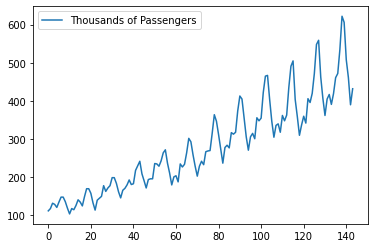

In [ ]:
df.plot()

In [ ]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
df.drop(144,axis=0,inplace=True)

In [ ]:
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [ ]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [ ]:
from fbprophet import Prophet

In [ ]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [ ]:
# Initialize the Model
model=Prophet(weekly_seasonality=True,daily_seasonality=True,)

In [ ]:
df.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
df.dropna(axis=0,inplace=True)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [ ]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [ ]:
model.fit(df)

In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [ ]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [ ]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [ ]:
prediction=model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,110.875972,59.653365,115.647935,110.875972,110.875972,-24.301175,-24.301175,-24.301175,-3.950032,-3.950032,-3.950032,1.159052,1.159052,1.159052,-21.510196,-21.510196,-21.510196,0.0,0.0,0.0,86.574797
1,1949-02-01,113.032940,49.058861,105.586294,113.032940,113.032940,-37.423490,-37.423490,-37.423490,-3.950032,-3.950032,-3.950032,-3.819109,-3.819109,-3.819109,-29.654349,-29.654349,-29.654349,0.0,0.0,0.0,75.609450
2,1949-03-01,114.981170,76.982431,135.325673,114.981170,114.981170,-7.699014,-7.699014,-7.699014,-3.950032,-3.950032,-3.950032,-3.819109,-3.819109,-3.819109,0.070127,0.070127,0.070127,0.0,0.0,0.0,107.282155
3,1949-04-01,117.138138,84.384049,139.545589,117.138138,117.138138,-4.461027,-4.461027,-4.461027,-3.950032,-3.950032,-3.950032,4.728860,4.728860,4.728860,-5.239855,-5.239855,-5.239855,0.0,0.0,0.0,112.677111
4,1949-05-01,119.225527,81.045875,136.168257,119.225527,119.225527,-8.945353,-8.945353,-8.945353,-3.950032,-3.950032,-3.950032,-1.608789,-1.608789,-1.608789,-3.386533,-3.386533,-3.386533,0.0,0.0,0.0,110.280174


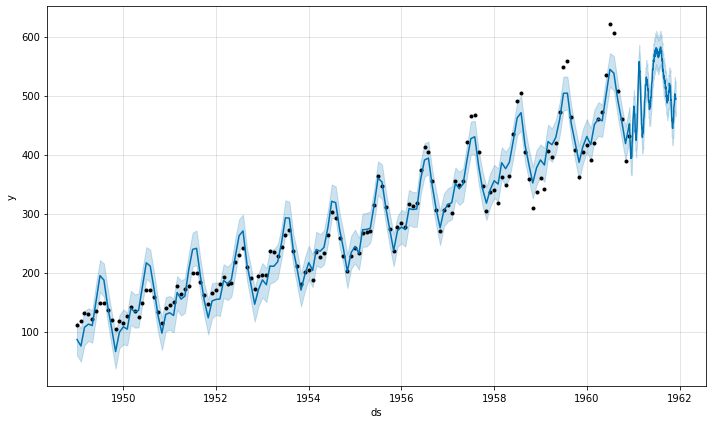

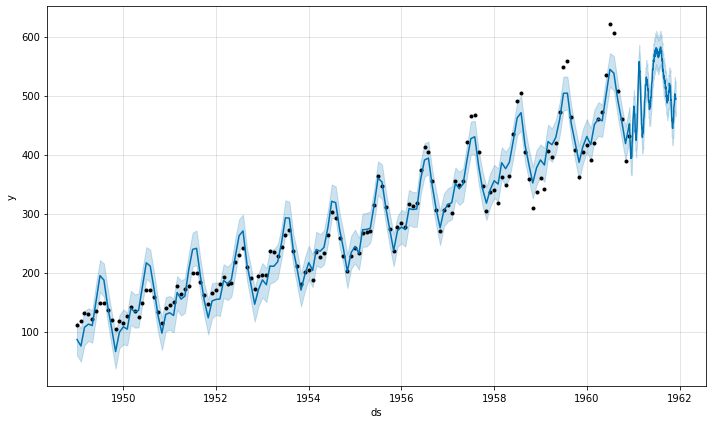

In [ ]:
### plot the predicted projection
model.plot(prediction)

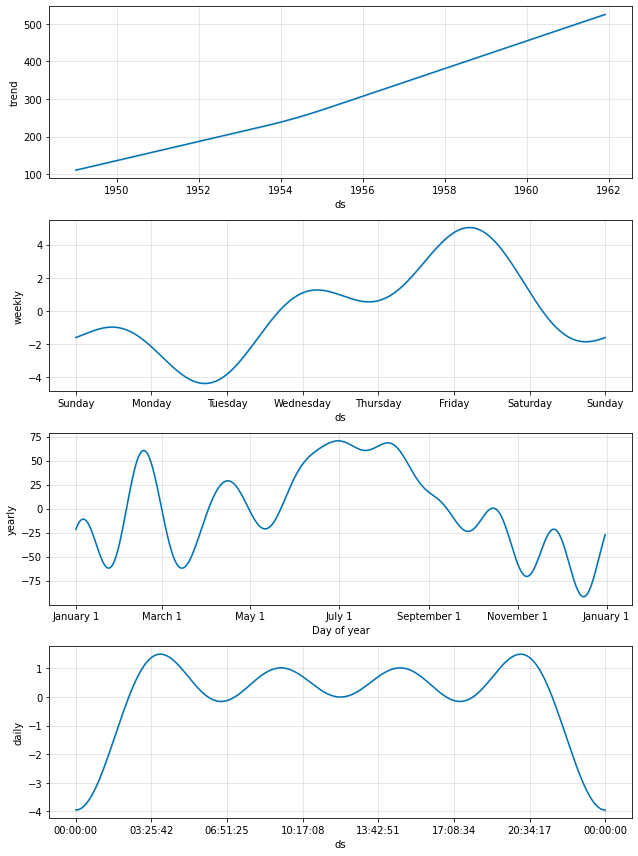

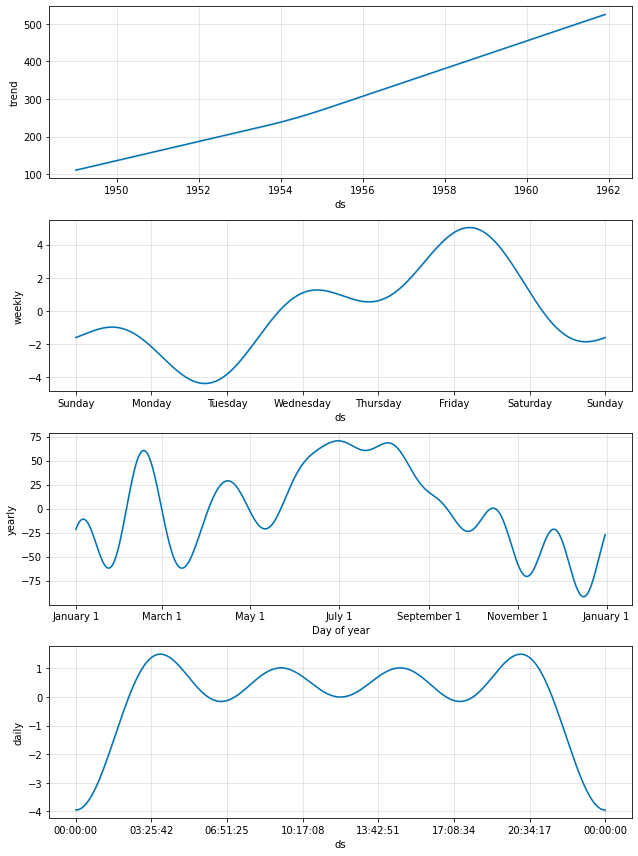

In [ ]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)